                                name  income_group*attendance
0                American University                 2.387671
1                    Amherst College                 2.740894
2                  Auburn University                 6.779187
3                    Barnard College                 2.148590
4                      Bates College                 1.322965
..                               ...                      ...
134                  Whitman College                 1.130891
135                 Williams College                 4.381222
136  Worcester Polytechnic Institute                 1.767429
137                  Yale University                21.455492
138               Yeshiva University                 1.323930

[139 rows x 2 columns]
                      Name                                         Alma Mater  \
0         Acaba, Joseph M.  University Of California, Santa Barbara; Unive...   
1        Adamson, James C.          US Military Academy; Princeton Uni

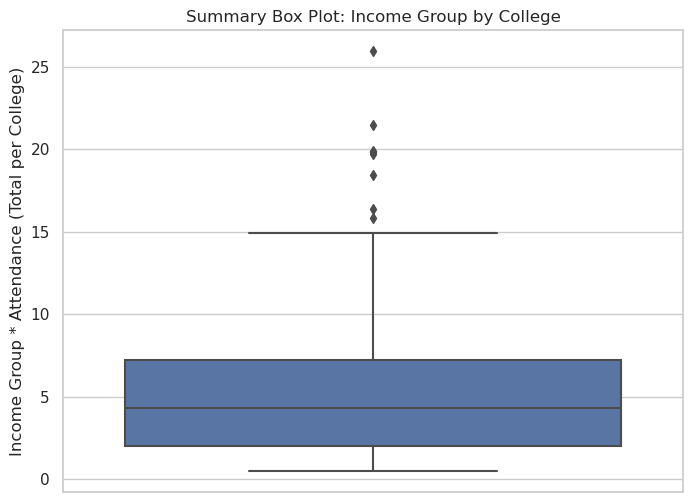

Max Value for Astronaut Colleges: 25.950342410275017
Min Value for Astronaut Colleges: 0.701179985589002
Mean Value for Astronaut Colleges: 9.94412640199187
Median Value for Astronaut Colleges: 7.321339880457992


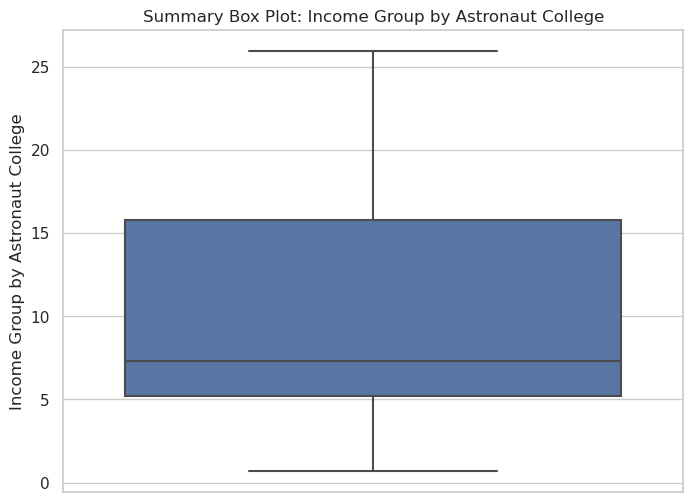

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def reformat_name(name):
    parts = name.split()
    if "II" in parts[-1]:
        del parts[-1]
    if len(parts) == 3 and "." in parts[1]:
        return f"{parts[2]}, {parts[0]} {parts[1]}"
    if len(parts) == 2:
        return f"{parts[1]}, {parts[0]}"
    return name

def matching_college(college_str, college_list):
    colleges = [c.strip() for c in college_str.split(";")]
    for c in colleges:
        if c in college_list:
            return college_list[c]
    return None

df = pd.read_csv('CollegeAdmissions_Data.csv')
df["income_group*attendance"] = df["par_income_bin"] * df["attend"]
college_summary = df.groupby("name")["income_group*attendance"].sum().reset_index()
college_map = dict(zip(college_summary["name"], college_summary["income_group*attendance"]))
print(college_summary)

df2 = pd.read_csv('astronauts colleges.csv')
df2["Name"] = df2["Name"].apply(reformat_name)
df2.to_csv("astronauts colleges.csv", index=False)

df3 = pd.read_csv('Social_Science.csv')
df3 = df3.drop_duplicates(subset="Profile.Name")
matched_df = pd.merge(df2, df3, left_on = "Name", right_on = "Profile.Name", how = "inner")
result = matched_df[["Name", "Alma Mater"]]

matched_df["Income Group by College"] = matched_df["Alma Mater"].apply(lambda x: matching_college(x, college_map))
result = matched_df[["Name", "Alma Mater", "Income Group by College"]]
cleaned_result = result[result["Income Group by College"].notna()]
cleaned_result = cleaned_result.reset_index(drop=True)
print(cleaned_result)

print("Max Value for All Colleges: " + str(college_summary["income_group*attendance"].max()))
max_idx = college_summary["income_group*attendance"].idxmax()
max_college = college_summary.loc[max_idx, "name"]
max_value = college_summary.loc[max_idx, "income_group*attendance"]
print(f"College with max Income Group by College: {max_college}")
print("Min Value for All Colleges: " + str(college_summary["income_group*attendance"].min()))
min_idx = college_summary["income_group*attendance"].idxmin()
min_college = college_summary.loc[min_idx, "name"]
min_value = college_summary.loc[min_idx, "income_group*attendance"]
print(f"College with min Income Group by College: {min_college}")

print("Mean Value for All Colleges: " + str(college_summary["income_group*attendance"].mean()))
print("Median Value for All Colleges: " + str(college_summary["income_group*attendance"].median()))

sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=college_summary["income_group*attendance"])

# Add title and label
plt.title("Summary Box Plot: Income Group by College")
plt.ylabel("Income Group * Attendance (Total per College)")

# Show the plot
plt.show()

print("Max Value for Astronaut Colleges: " + str(cleaned_result["Income Group by College"].max()))
print("Min Value for Astronaut Colleges: " + str(cleaned_result["Income Group by College"].min()))
print("Mean Value for Astronaut Colleges: " + str(cleaned_result["Income Group by College"].mean()))
print("Median Value for Astronaut Colleges: " + str(cleaned_result["Income Group by College"].median()))

sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=cleaned_result["Income Group by College"])

# Add title and label
plt.title("Summary Box Plot: Income Group by Astronaut College")
plt.ylabel("Income Group by Astronaut College")

# Show the plot
plt.show()